# Feature Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('wisc_bc_data.csv')

In [4]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
df.shape

(569, 32)

#### Seperate the input ans output

In [6]:
x = df.drop(['id', 'diagnosis'], axis =1)
y = df['diagnosis']

In [7]:
y.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [8]:
x.shape

(569, 30)

#### Feature Selection

In [9]:
from sklearn.feature_selection import SelectKBest, chi2

In [10]:
skf = SelectKBest(k =10, score_func= chi2)

In [11]:
skf.fit(x,y)

SelectKBest(score_func=<function chi2 at 0x000001CC88117820>)

In [12]:
skf.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False])

In [13]:
x_new = x.iloc[:,skf.get_support()]

In [14]:
x_new.shape

(569, 10)

##### data should be in numerical format only

### Cross validation

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x_new, y, random_state=0)

In [16]:
x_train.shape, x_test.shape

((426, 10), (143, 10))

### Build model

In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [20]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.965034965034965

In [21]:
# Feature Selection -Wrapper

In [22]:
df = pd.read_csv('mtcars.csv')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [24]:
x = df.drop('mpg', axis=1)
y = df['mpg']

In [25]:
x.shape

(32, 10)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE    # recursive feature selection method 

In [27]:
reg = LinearRegression()

#### feature selection

In [28]:
rfe = RFE(estimator=reg, n_features_to_select=3)

In [29]:
rfe.fit(x,y)

RFE(estimator=LinearRegression(), n_features_to_select=3)

In [30]:
rfe.get_support()

array([False, False, False, False,  True,  True, False,  True, False,
       False])

In [31]:
x_new = x.iloc[:,rfe.get_support()]

In [32]:
x_new

,wt,qsec,am
0,2.620,16.46,1
1,2.875,17.02,1
2,2.320,18.61,1
3,3.215,19.44,0
4,3.440,17.02,0
5,3.460,20.22,0
6,3.570,15.84,0
7,3.190,20.00,0
8,3.150,22.90,0
9,3.440,18.30,0


## cross validation 

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x_new, y, random_state=0)


### model tarin

In [42]:
reg.fit(x_train,y_train)

LinearRegression()

In [43]:
reg.score(x_test, y_test)

0.5817889981222737

In [44]:

reg.fit(x_new,y)

LinearRegression()

In [45]:
reg.score(x_new,y)

0.8496635563617072

# DImensionality Reduction

In [47]:
df = pd.read_csv('wisc_bc_data.csv')

In [48]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### seperating Input and output

In [52]:
x = df.drop(['id','diagnosis'], axis=1)
y = df['diagnosis']

In [53]:
x.shape

(569, 30)

#### Normalize the data

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

## Principal Component Analysis

In [56]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x_scaled)

In [57]:
var = pca.explained_variance_ratio_
var

array([5.30976894e-01, 1.72834896e-01, 7.11444201e-02, 6.41125883e-02,
       4.08607204e-02, 3.07149442e-02, 1.58083746e-02, 1.19147161e-02,
       9.88429103e-03, 9.45446106e-03, 8.49396551e-03, 7.57976457e-03,
       6.56638137e-03, 4.74811462e-03, 2.69423338e-03, 2.57754484e-03,
       1.83755588e-03, 1.51271660e-03, 1.37718463e-03, 1.05959242e-03,
       9.83061040e-04, 7.84496266e-04, 5.28060046e-04, 5.09986666e-04,
       4.30073326e-04, 3.29617326e-04, 1.90574049e-04, 5.59104265e-05,
       2.88966877e-05, 5.96453235e-06])

<BarContainer object of 30 artists>

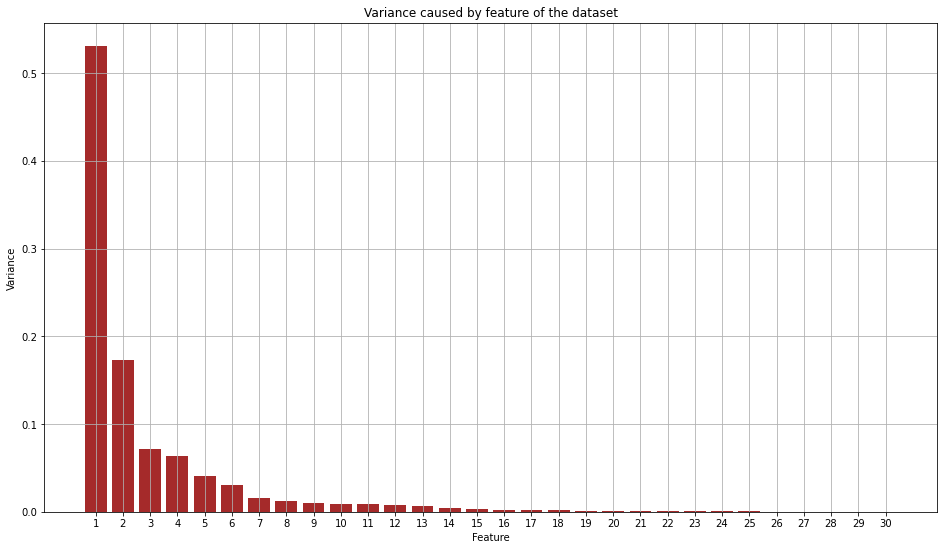

In [58]:
plt.figure(figsize=(16,9))
plt.title('Variance caused by feature of the dataset')
plt.xlabel('Feature')
plt.ylabel('Variance')
plt.grid()
plt.xticks(range(1,31))
plt.bar(range(1,31), var, color='brown')

In [67]:
pca = PCA(n_components=5)
x_pca = pca.fit_transform(x_scaled)

In [68]:
x_pca.shape

(569, 5)

#### Cross validation`

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, random_state=0)

## Build the model

In [70]:
from sklearn.svm import SVC
classifier = SVC(random_state=0)

In [71]:
classifier.fit(x_train,y_train)

SVC(random_state=0)

### Evaluation

In [72]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.965034965034965